All imports 
----

In [1]:
import os
import numpy as np
import pandas as pd

import sklearn
from mlxtend.evaluate import bootstrap_point632_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from metrics import score_regression
from preprocess import get_dataset, preprocess_all, dataset_to_X_y, SUBSET_FEATURES

Get the dataset in a DataFrame and preprocess it
---

In [2]:
datasets_path = os.path.join(os.curdir, "datasets")

dataset = get_dataset(datasets_path, train_size=.8, seed=42)
dataset = preprocess_all(dataset)

X_train, y_train, X_val, y_val = dataset_to_X_y(dataset, keys="all")

Linear regression on the 58 train features
---

In [4]:
lr = LinearRegression()

scores = bootstrap_point632_score(lr, X_train, y_train, n_splits=100)

print(scores)

[9.84374439e+07 1.23674267e+17 5.86101006e+16 1.39426951e+08
 6.64359571e+14 7.01209592e+07 1.44921082e+08 9.09094792e+16
 1.41457125e+08 1.07186070e+17 1.53695003e+17 8.05495752e+07
 1.03693459e+08 6.61825085e+14 1.62997245e+08 1.21269497e+08
 9.45081507e+14 1.61162146e+08 9.51829086e+07 1.58083469e+17
 8.32839558e+16 1.17534749e+17 1.61841698e+08 5.20670271e+16
 6.20709519e+16 1.52370783e+08 1.40116321e+08 1.62394770e+08
 9.41317530e+07 1.41506360e+08 1.45175207e+17 7.42274938e+07
 1.54834927e+08 3.17067680e+17 2.87335230e+17 1.36347912e+08
 8.93678622e+07 8.77353618e+07 8.23402453e+07 5.43814743e+17
 7.84167784e+07 1.48621558e+08 8.77417181e+07 8.43639149e+07
 1.62484396e+08 1.04765681e+18 7.11123826e+07 1.87430551e+17
 7.54793024e+07 9.53216114e+07 1.43937560e+08 9.69843377e+07
 4.97896994e+14 6.91185873e+07 7.14856942e+17 1.48410884e+08
 1.46419173e+08 1.22608100e+18 3.42869388e+17 1.29973104e+17
 1.45500677e+08 1.45979553e+08 1.12200051e+17 1.63470116e+08
 1.63367534e+08 5.252423

Inference on the validation set
---

In [6]:
y_val_pred = lr.predict(dataset.validation.X.values)
y_train_pred = lr.predict(dataset.train.X.values)


val_score = score_regression(dataset.validation.y.values, y_val_pred)
train_score = score_regression(dataset.train.y.values, y_train_pred)

print(f"Score on the validation set : {val_score:.3f}")
print(f"Score on the train set      : {train_score:.3f}")

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

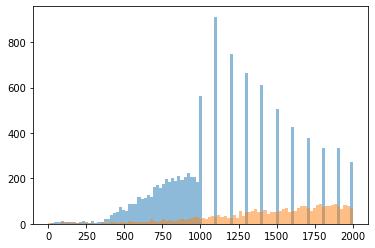

In [27]:
import matplotlib.pyplot as plt

#plt.figure()
#plt.scatter(dataset.train.y.values, y_train_pred, alpha=.25, color='red')
#plt.scatter(dataset.validation.y.values, y_val_pred, alpha=.25)
bins = np.linspace(0, 2e3, 100)
plt.hist(dataset.train.y.values, bins=bins, alpha=.5)
plt.hist(y_train_pred, bins=bins, alpha=.5)
plt.show()